In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
folder_address = '/Users/macbook/Downloads/test_tasks/sbermarket/sbermarket-internship-competition/'
data = pd.read_csv(folder_address + 'train.csv')
sample = pd.read_csv(folder_address + 'sample_submission.csv')

In [3]:
data
#sample

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
...,...,...,...
3123059,12702,2020-09-03 23:45:45,441
3123060,12702,2020-09-03 23:45:45,92
3123061,12702,2020-09-03 23:45:45,431
3123062,12702,2020-09-03 23:45:45,24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123064 entries, 0 to 3123063
Data columns (total 3 columns):
user_id               int64
order_completed_at    object
cart                  int64
dtypes: int64(2), object(1)
memory usage: 71.5+ MB


In [5]:
data.order_completed_at = pd.to_datetime(data.order_completed_at)

## Анализ данных
### Сгруппируем данные в заказы

In [6]:
def collect_carts(x):
    return list(x['cart'])

#data.groupby(['order_completed_at', 'user_id']).apply(collect_carts)
#то же самое через лямбда-функцию
#data.groupby(['order_completed_at', 'user_id']).apply(lambda x: list(x['cart']))    

In [7]:
orders = data.groupby(['order_completed_at', 'user_id']).apply(collect_carts).reset_index()
orders = orders.rename(columns = {0: 'carts_in_order'})
orders

,order_completed_at,user_id,carts_in_order
0,2015-03-22 09:25:46,2,"[399, 14, 198, 88, 157, 82, 134, 16, 409, 384,..."
1,2015-06-18 16:15:33,3,[399]
2,2015-07-04 14:05:22,3,[399]
3,2015-07-08 06:59:04,4,"[54, 55]"
4,2015-07-22 08:16:24,5,"[409, 88, 376, 14, 423, 23, 92, 29, 386, 440, ..."
...,...,...,...
209401,2020-09-03 23:06:59,10137,"[29, 411, 41, 42, 89, 43]"
209402,2020-09-03 23:17:54,7858,"[89, 83, 712, 22, 27]"
209403,2020-09-03 23:20:49,15887,"[23, 25, 19, 799, 84, 9, 85, 57, 29, 26, 430, ..."
209404,2020-09-03 23:39:40,19188,"[57, 409, 82, 14, 198, 398, 31, 442, 151, 23, ..."


In [8]:
# посмотрим на заказы некоторых пользователей
pd.set_option('display.max_colwidth', 1000)
orders[orders.user_id == 14]


,order_completed_at,user_id,carts_in_order
12,2016-04-24 15:59:48,14,"[92, 24, 383, 31, 103, 77, 396]"
41,2016-10-02 15:56:05,14,"[165, 19, 17, 16, 112, 14, 198, 205, 5, 420, 403, 82, 85, 430, 99, 419, 23, 422, 169, 407, 409, 170, 57, 411, 66, 179, 398, 25, 396, 812, 406, 808, 157]"
42,2016-10-04 09:32:52,14,"[432, 57, 103, 380, 381, 99, 431, 102, 430, 100, 89, 171, 6, 61]"
47,2016-10-13 23:17:42,14,"[376, 169, 61, 165, 430, 170, 63, 411, 57, 394, 383, 379, 231, 377, 82, 140, 22, 203, 103, 99, 89, 27]"
61,2016-10-28 09:50:33,14,"[41, 403, 42, 57, 396, 430, 382, 160, 395, 87, 394, 322, 820, 89, 316, 84, 426, 16, 22, 23, 318, 638, 25, 411, 438, 104, 99, 100, 102, 103]"
...,...,...,...
115845,2020-06-09 11:47:31,14,"[804, 446, 169, 394, 55]"
148907,2020-07-09 10:42:44,14,"[417, 408, 382, 0, 19, 170, 422, 67, 430, 256, 169]"
176768,2020-08-04 14:03:47,14,"[394, 440, 807, 445, 169, 198, 19, 82, 87, 170, 84, 22, 253]"
192258,2020-08-18 11:26:07,14,"[19, 169, 85, 5, 67, 382, 209]"


In [9]:
pd.reset_option('display.max_columns')

### Посчитаем среднее количество категорий в заказе у каждого пользователя и частоту заказов каждой категории

In [10]:
def count_carts_number(x):
    count = 0
    for order in x['carts_in_order']:
        count += len(order)
    return count

In [11]:
users_carts_mean_number = orders.groupby('user_id').apply(count_carts_number)/orders.groupby('user_id')['carts_in_order'].count()
users_carts_mean_number = users_carts_mean_number.reset_index()
users_carts_mean_number.rename(columns = {0:'mean_carts_number'}, inplace = True)
users_carts_mean_number

,user_id,mean_carts_number
0,0,14.666667
1,1,4.111111
2,2,11.466667
3,3,8.857143
4,4,14.000000
...,...,...
19995,19995,3.000000
19996,19996,5.666667
19997,19997,14.000000
19998,19998,6.333333


In [12]:
from itertools import groupby
import collections

def list_of_favourite_carts(x): # создает отсортированный (по частоте) список заказанных категорий пользователя
    carts_list = []
    for order in x['carts_in_order']:
        carts_list.extend(order)
    counts = collections.Counter(carts_list)
    new_list = sorted(carts_list, key=lambda y: (counts[y], y), reverse=True)
    
    cart_list = [el for el, _ in groupby(new_list)]
    
    return cart_list

In [13]:
users_favourite_carts = orders.groupby('user_id').apply(list_of_favourite_carts).reset_index()
pd.set_option('display.max_colwidth', 1000)
users_favourite_carts

,user_id,0
0,0,"[57, 441, 405, 379, 84, 82, 14, 821, 803, 799, 440, 432, 430, 411, 409, 402, 401, 399, 398, 396, 383, 382, 170, 169, 157, 133, 83, 61, 55, 41, 26, 25, 22, 20, 10, 5]"
1,1,"[55, 798, 169, 88, 14, 812, 803, 421, 307, 302, 231, 204, 171, 170, 149, 86, 82, 54, 23, 19]"
2,2,"[23, 57, 61, 403, 82, 430, 409, 382, 804, 398, 383, 22, 15, 396, 380, 197, 87, 67, 432, 420, 412, 402, 393, 376, 199, 198, 165, 160, 157, 134, 100, 88, 84, 54, 41, 29, 24, 19, 17, 16, 5, 820, 808, 743, 431, 425, 408, 406, 399, 395, 392, 384, 381, 379, 377, 219, 203, 168, 159, 158, 139, 135, 129, 99, 89, 85, 64, 55, 43, 42, 25, 14, 9, 0]"
3,3,"[399, 383, 382, 57, 43, 41, 19, 430, 398, 179, 84, 64, 61, 27, 22, 16, 15, 804, 712, 442, 412, 411, 404, 402, 380, 376, 148, 142, 134, 100, 92, 91, 88, 77, 62, 42, 17, 14]"
4,4,"[398, 57, 420, 98, 54, 712, 102, 100, 84, 61, 29, 22, 16, 425, 400, 391, 388, 17, 619, 430, 421, 383, 50, 5, 812, 805, 800, 799, 443, 431, 409, 387, 384, 379, 204, 179, 134, 133, 107, 101, 99, 89, 88, 87, 85, 77, 55, 26, 21, 19]"
...,...,...
19995,19995,"[712, 398, 393, 84, 67, 57, 31, 14, 0]"
19996,19996,"[812, 804, 443, 431, 409, 404, 396, 393, 231, 92, 84, 82, 61, 57, 22, 21, 14]"
19997,19997,"[61, 57, 55, 49, 479, 443, 430, 420, 398, 383, 382, 244, 243, 239, 232, 231, 227, 223, 219, 218, 203, 198, 197, 160, 135, 131, 107, 106, 103, 99, 98, 87, 84, 77, 23, 17, 14, 0]"
19998,19998,"[420, 415, 398, 84, 57, 6, 798, 409, 61, 31, 29, 26, 19]"


In [14]:
users_data = users_carts_mean_number.merge(users_favourite_carts, on = 'user_id')
users_data.rename(columns = {0: 'favourite_carts'}, inplace = True)
users_data

,user_id,mean_carts_number,favourite_carts
0,0,14.666667,"[57, 441, 405, 379, 84, 82, 14, 821, 803, 799, 440, 432, 430, 411, 409, 402, 401, 399, 398, 396, 383, 382, 170, 169, 157, 133, 83, 61, 55, 41, 26, 25, 22, 20, 10, 5]"
1,1,4.111111,"[55, 798, 169, 88, 14, 812, 803, 421, 307, 302, 231, 204, 171, 170, 149, 86, 82, 54, 23, 19]"
2,2,11.466667,"[23, 57, 61, 403, 82, 430, 409, 382, 804, 398, 383, 22, 15, 396, 380, 197, 87, 67, 432, 420, 412, 402, 393, 376, 199, 198, 165, 160, 157, 134, 100, 88, 84, 54, 41, 29, 24, 19, 17, 16, 5, 820, 808, 743, 431, 425, 408, 406, 399, 395, 392, 384, 381, 379, 377, 219, 203, 168, 159, 158, 139, 135, 129, 99, 89, 85, 64, 55, 43, 42, 25, 14, 9, 0]"
3,3,8.857143,"[399, 383, 382, 57, 43, 41, 19, 430, 398, 179, 84, 64, 61, 27, 22, 16, 15, 804, 712, 442, 412, 411, 404, 402, 380, 376, 148, 142, 134, 100, 92, 91, 88, 77, 62, 42, 17, 14]"
4,4,14.000000,"[398, 57, 420, 98, 54, 712, 102, 100, 84, 61, 29, 22, 16, 425, 400, 391, 388, 17, 619, 430, 421, 383, 50, 5, 812, 805, 800, 799, 443, 431, 409, 387, 384, 379, 204, 179, 134, 133, 107, 101, 99, 89, 88, 87, 85, 77, 55, 26, 21, 19]"
...,...,...,...
19995,19995,3.000000,"[712, 398, 393, 84, 67, 57, 31, 14, 0]"
19996,19996,5.666667,"[812, 804, 443, 431, 409, 404, 396, 393, 231, 92, 84, 82, 61, 57, 22, 21, 14]"
19997,19997,14.000000,"[61, 57, 55, 49, 479, 443, 430, 420, 398, 383, 382, 244, 243, 239, 232, 231, 227, 223, 219, 218, 203, 198, 197, 160, 135, 131, 107, 106, 103, 99, 98, 87, 84, 77, 23, 17, 14, 0]"
19998,19998,6.333333,"[420, 415, 398, 84, 57, 6, 798, 409, 61, 31, 29, 26, 19]"


In [15]:
#округлим средние количества товаров в заказе (округление в традиционном математическом смысле)
users_data.mean_carts_number += 0.5
users_data = users_data.astype({'mean_carts_number': int})
users_data

,user_id,mean_carts_number,favourite_carts
0,0,15,"[57, 441, 405, 379, 84, 82, 14, 821, 803, 799, 440, 432, 430, 411, 409, 402, 401, 399, 398, 396, 383, 382, 170, 169, 157, 133, 83, 61, 55, 41, 26, 25, 22, 20, 10, 5]"
1,1,4,"[55, 798, 169, 88, 14, 812, 803, 421, 307, 302, 231, 204, 171, 170, 149, 86, 82, 54, 23, 19]"
2,2,11,"[23, 57, 61, 403, 82, 430, 409, 382, 804, 398, 383, 22, 15, 396, 380, 197, 87, 67, 432, 420, 412, 402, 393, 376, 199, 198, 165, 160, 157, 134, 100, 88, 84, 54, 41, 29, 24, 19, 17, 16, 5, 820, 808, 743, 431, 425, 408, 406, 399, 395, 392, 384, 381, 379, 377, 219, 203, 168, 159, 158, 139, 135, 129, 99, 89, 85, 64, 55, 43, 42, 25, 14, 9, 0]"
3,3,9,"[399, 383, 382, 57, 43, 41, 19, 430, 398, 179, 84, 64, 61, 27, 22, 16, 15, 804, 712, 442, 412, 411, 404, 402, 380, 376, 148, 142, 134, 100, 92, 91, 88, 77, 62, 42, 17, 14]"
4,4,14,"[398, 57, 420, 98, 54, 712, 102, 100, 84, 61, 29, 22, 16, 425, 400, 391, 388, 17, 619, 430, 421, 383, 50, 5, 812, 805, 800, 799, 443, 431, 409, 387, 384, 379, 204, 179, 134, 133, 107, 101, 99, 89, 88, 87, 85, 77, 55, 26, 21, 19]"
...,...,...,...
19995,19995,3,"[712, 398, 393, 84, 67, 57, 31, 14, 0]"
19996,19996,6,"[812, 804, 443, 431, 409, 404, 396, 393, 231, 92, 84, 82, 61, 57, 22, 21, 14]"
19997,19997,14,"[61, 57, 55, 49, 479, 443, 430, 420, 398, 383, 382, 244, 243, 239, 232, 231, 227, 223, 219, 218, 203, 198, 197, 160, 135, 131, 107, 106, 103, 99, 98, 87, 84, 77, 23, 17, 14, 0]"
19998,19998,6,"[420, 415, 398, 84, 57, 6, 798, 409, 61, 31, 29, 26, 19]"


In [16]:
d = {}
indexer = 0

for index, row in tqdm(users_data.iterrows()):
    mean_carts_number = row.mean_carts_number
    user_id = row.user_id
    favourite_carts = row.favourite_carts
        
    for i in range(len(favourite_carts)):
        id_to_add = str(user_id) + ';' + str(favourite_carts[i])
        if i < mean_carts_number:
            target_to_add = 1
        else:
            target_to_add = 0
        d[indexer] = {'id':id_to_add, 'target': target_to_add}
        indexer +=1
        
submission = pd.DataFrame.from_dict(d, 'index')

20000it [00:04, 4611.78it/s]


In [17]:
submission.astype({'target':int})

,id,target
0,0;57,1
1,0;441,1
2,0;405,1
3,0;379,1
4,0;84,1
...,...,...
1117595,19998;31,0
1117596,19998;29,0
1117597,19998;26,0
1117598,19998;19,0


In [18]:
sample.drop('target', axis = 1, inplace = True)
submission = submission.merge(sample, how = 'right')

In [19]:
submission.to_csv('/Users/macbook/Downloads/test_tasks/sbermarket/sbermarket-internship-competition/submission.csv', index = False)

### Score = 0.46475, 40-е место - неплохо, для чисто аналитического решения
### лучшие решения у лидеров соревнования ~ 0,49
### нужно поэкспериментировать с глубиной анализируемой истории
### Релизовать ML-решение: прикрутить и обучить какой-нибудь классификатор

### Еще немного аналитики

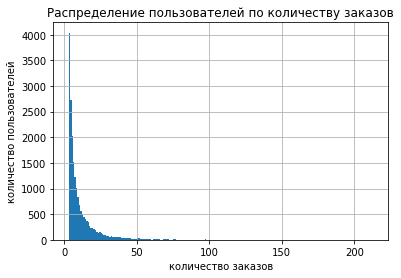

In [23]:
import matplotlib.pyplot as plt

orders.user_id.value_counts().hist(bins = 210)
plt.title('Распределение пользователей по количеству заказов')
plt.xlabel('количество заказов')
plt.ylabel('количество пользователей')
plt.show()

In [21]:
orders.user_id.value_counts().describe()

count    20000.000000
mean        10.470300
std         11.905856
min          3.000000
25%          4.000000
50%          6.000000
75%         12.000000
max        213.000000
Name: user_id, dtype: float64

In [22]:
data.order_completed_at.describe()

count                 3123064
unique                 208155
top       2019-10-04 06:39:01
freq                      120
first     2015-03-22 09:25:46
last      2020-09-03 23:45:45
Name: order_completed_at, dtype: object